<a href="https://colab.research.google.com/github/paulopetrillo/PROJETO_IFMA_SOFTEX/blob/main/PROJETO_IFMA_SOFTEX_2024_01_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# importa a biblioteca numpy
import numpy as np
print(np.__version__)

1.23.5


In [28]:
# importa biblioteca Pandas.
import pandas as pd
print(pd.__version__)

1.5.3


In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# # Grava datDataFrame_Geral em Googe drive
# #drive.mount('/content/drive')
# DataFrame_Geral.to_csv('./drive/MyDrive/DataFrame_Geral.csv')
# DataFrame_Geral= pd.read_csv("./drive/MyDrive/Colab Notebooks/DataFrame_Geral.csv", header=0, sep=",")
DataFrame_Geral = pd.read_csv("./drive/MyDrive/DataFrame_Geral.csv", header=0, sep=",")
DataFrame_Geral

,Unnamed: 0,mandante,golsMand,golsVist,vistante,poder_ataque_time_mandante,poder_ataque_time_visitante,poder_defesa_time_mandante,poder_defesa_time_visitante,classe_resultado
0,116,Atlético,4,3,São Paulo,9,6,8,5,1
1,117,Atlético,2,0,Santos,12,0,7,4,1
2,123,Sport,0,0,Atlético,6,11,9,12,0
3,130,Palmeiras,0,1,Internacional,8,5,5,4,2
4,131,Atlético,1,2,Botafogo,14,7,6,6,2
...,...,...,...,...,...,...,...,...,...,...
2535,375,Fortaleza - CE,2,1,Bahia - BA,6,1,5,6,1
2536,376,Sport - PE,1,1,Athletico Paranaense - PR,6,3,4,6,0
2537,377,Red Bull Bragantino - SP,1,0,Internacional - RS,8,1,3,6,1
2538,378,Juventude - RS,1,0,Corinthians - SP,4,3,1,9,1


In [31]:
# altera valores 0, 1 e 2 para 0, 0,5 e 1 que representa zero vitoria, meia vitoria e uma vitoria completa.
# DataFrame_Geral['classe_resultado'] = DataFrame_Geral['classe_resultado'].replace({1:0.5, 2:1})
DataFrame_Geral['classe_resultado'].replace({0:0.5, 1:1, 2:0}, inplace=True)

# visvit (dataframe visao vitoria)
DataFrame_Geral_visvit = DataFrame_Geral.copy()
DataFrame_Geral_visvit

,Unnamed: 0,mandante,golsMand,golsVist,vistante,poder_ataque_time_mandante,poder_ataque_time_visitante,poder_defesa_time_mandante,poder_defesa_time_visitante,classe_resultado
0,116,Atlético,4,3,São Paulo,9,6,8,5,1.0
1,117,Atlético,2,0,Santos,12,0,7,4,1.0
2,123,Sport,0,0,Atlético,6,11,9,12,0.5
3,130,Palmeiras,0,1,Internacional,8,5,5,4,0.0
4,131,Atlético,1,2,Botafogo,14,7,6,6,0.0
...,...,...,...,...,...,...,...,...,...,...
2535,375,Fortaleza - CE,2,1,Bahia - BA,6,1,5,6,1.0
2536,376,Sport - PE,1,1,Athletico Paranaense - PR,6,3,4,6,0.5
2537,377,Red Bull Bragantino - SP,1,0,Internacional - RS,8,1,3,6,1.0
2538,378,Juventude - RS,1,0,Corinthians - SP,4,3,1,9,1.0


In [32]:
# Apaga colunas desnecessarias para o treinamento.
DataFrame_Geral_visvit.drop(['mandante', 'golsMand', 'golsVist', 'vistante'], axis=1, inplace=True)
DataFrame_Geral_visvit

,Unnamed: 0,poder_ataque_time_mandante,poder_ataque_time_visitante,poder_defesa_time_mandante,poder_defesa_time_visitante,classe_resultado
0,116,9,6,8,5,1.0
1,117,12,0,7,4,1.0
2,123,6,11,9,12,0.5
3,130,8,5,5,4,0.0
4,131,14,7,6,6,0.0
...,...,...,...,...,...,...
2535,375,6,1,5,6,1.0
2536,376,6,3,4,6,0.5
2537,377,8,1,3,6,1.0
2538,378,4,3,1,9,1.0


In [33]:
# Retira indice desnecessario
DataFrame_Geral_visvit = DataFrame_Geral_visvit[['poder_ataque_time_mandante', 'poder_ataque_time_visitante', 'poder_defesa_time_mandante',	'poder_defesa_time_visitante',	'classe_resultado' ]]
DataFrame_Geral_visvit

,poder_ataque_time_mandante,poder_ataque_time_visitante,poder_defesa_time_mandante,poder_defesa_time_visitante,classe_resultado
0,9,6,8,5,1.0
1,12,0,7,4,1.0
2,6,11,9,12,0.5
3,8,5,5,4,0.0
4,14,7,6,6,0.0
...,...,...,...,...,...
2535,6,1,5,6,1.0
2536,6,3,4,6,0.5
2537,8,1,3,6,1.0
2538,4,3,1,9,1.0


# Verifica distribuicao de valores (carga desbalanceada).

In [34]:
# contagem dos valores da variavel target.
frequencia_visvit = DataFrame_Geral_visvit['classe_resultado'].value_counts()
frequencia_visvit

1.0    1258
0.5     674
0.0     608
Name: classe_resultado, dtype: int64

In [35]:
# Grava datDataFrame_Geral em Googe drive
#drive.mount('/content/drive')
DataFrame_Geral_visvit.to_csv('./drive/MyDrive/dataset/DataFrame_Geral_visvit.csv')

# Inicio do processo de treinamento de Redes Neurais

In [36]:
# Carrega as bibliotecas
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [37]:
# X é o dataframe sem a coluna de saída
X = DataFrame_Geral_visvit.drop("classe_resultado", axis=1)
print(X.head())
 # y é a coluna de saída
y = DataFrame_Geral_visvit["classe_resultado"]
print("----")
print(y.head())

   poder_ataque_time_mandante  poder_ataque_time_visitante  \
0                           9                            6   
1                          12                            0   
2                           6                           11   
3                           8                            5   
4                          14                            7   

   poder_defesa_time_mandante  poder_defesa_time_visitante  
0                           8                            5  
1                           7                            4  
2                           9                           12  
3                           5                            4  
4                           6                            6  
----
0    1.0
1    1.0
2    0.5
3    0.0
4    0.0
Name: classe_resultado, dtype: float64


In [38]:
X

,poder_ataque_time_mandante,poder_ataque_time_visitante,poder_defesa_time_mandante,poder_defesa_time_visitante
0,9,6,8,5
1,12,0,7,4
2,6,11,9,12
3,8,5,5,4
4,14,7,6,6
...,...,...,...,...
2535,6,1,5,6
2536,6,3,4,6
2537,8,1,3,6
2538,4,3,1,9


In [39]:
y.value_counts()

1.0    1258
0.5     674
0.0     608
Name: classe_resultado, dtype: int64

#Oversampling

In [40]:
# Biblioteca para balanceamento de carga.
from imblearn.over_sampling import SMOTE

In [41]:
##### >>>> Solucao do erro da celula abaixo Sujerida pelo Google <<<< #####

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode the target variable
y_encoded = label_encoder.fit_transform(y)

# Apply SMOTE to the encoded target variable
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

In [61]:
# # Aplicar SMOTE
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)

In [24]:
# # Técnica de balanceamento de dados - OverSample - inclue dados nas amostras pequenas.
# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(random_state=0)
# X_resampled, y_resampled = ros.fit_resample(X, y)
# y_resampled.value_counts()

In [42]:
# Verifica balanceamento de carga.
y_df = y_resampled
y_DF = pd.DataFrame(y_df)
y_DF.value_counts()

0    1258
1    1258
2    1258
dtype: int64

# Otimizacao dos parametros do treianmento MLP


In [43]:
# Tecnica de otimização de parametros para executar o Treinamento Neural

parameter_space = {
    'hidden_layer_sizes': [(50,), (5,), (1,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)
print('Best parameters found:\n', clf.best_params_)

#======================================================================================================================
# Best parameters found (rodado em 02/01/24 às 11:21)
# {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'solver': 'sgd'}
# Acurácia do treinamento: 0.416363
# Acurácia do teste: 0.390728
#======================================================================================================================
# Best parameters found (rodado em 02/01/24 às 19:30)
# {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}
# Acurácia do treinamento: 0.435575
# Acurácia do teste: 0.401325
#======================================================================================================================

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}


# EXECUTA TREINAMENTO

In [44]:
# Divide os dados em conjuntos de treinamento e teste (executado oversample)
X_train, X_test, y_train, y_test = train_test_split(X_resampled,
                                                    y_resampled,
                                                #    random_state=42,
                                                    test_size=0.2
                                                    )

In [45]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

3019
3019
755
755


In [46]:
from sklearn.model_selection import GridSearchCV
mlp = MLPClassifier()

In [47]:
# Cria uma instância do MLPClassifier
mlp = MLPClassifier(max_iter=500
                  , activation='tanh'
                  , alpha=0.0001
                  , hidden_layer_sizes=(50,)
                  , learning_rate='adaptive'
                  , solver='sgd'
                  , verbose=10
                  , random_state=42)

# Treinamento do modelo
mlp = mlp.fit(X_train, y_train)

# Imprime Acurácia do modelo
print("Acurácia do treinamento: %f" % mlp.score(X_train, y_train))
print("Acurácia do teste: %f" % mlp.score(X_test, y_test))

Iteration 1, loss = 1.39423308
Iteration 2, loss = 1.16784196
Iteration 3, loss = 1.12844546
Iteration 4, loss = 1.10971069
Iteration 5, loss = 1.10061144
Iteration 6, loss = 1.09400574
Iteration 7, loss = 1.09158302
Iteration 8, loss = 1.08820560
Iteration 9, loss = 1.08611633
Iteration 10, loss = 1.08540572
Iteration 11, loss = 1.08406294
Iteration 12, loss = 1.08429522
Iteration 13, loss = 1.08280633
Iteration 14, loss = 1.08275328
Iteration 15, loss = 1.08168718
Iteration 16, loss = 1.08103790
Iteration 17, loss = 1.08163555
Iteration 18, loss = 1.08143529
Iteration 19, loss = 1.08073343
Iteration 20, loss = 1.08032676
Iteration 21, loss = 1.08032260
Iteration 22, loss = 1.07966843
Iteration 23, loss = 1.07845002
Iteration 24, loss = 1.07829185
Iteration 25, loss = 1.07764671
Iteration 26, loss = 1.07756327
Iteration 27, loss = 1.07741532
Iteration 28, loss = 1.07729304
Iteration 29, loss = 1.07689607
Iteration 30, loss = 1.07659850
Iteration 31, loss = 1.07652246
Iteration 32, los

In [49]:
import pickle

# Salva o modelo
with open('mlp_model_visvit.pkl', 'wb') as f:
    pickle.dump(mlp, f)

In [51]:
# Carregue o modelo
with open('mlp_model_visvit.pkl', 'rb') as f:
    mlp_loaded = pickle.load(f)

In [87]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [53]:
#imprimir o relatório de classificação para MLP (Machine Learn Perception)
print(classification_report(y_test, mlp.predict(X_test)))

              precision    recall  f1-score   support

           0       0.44      0.38      0.41       262
           1       0.37      0.35      0.36       245
           2       0.40      0.47      0.43       248

    accuracy                           0.40       755
   macro avg       0.40      0.40      0.40       755
weighted avg       0.40      0.40      0.40       755



Text(0.5, 1.0, 'Modelo Machine Learn Perception')

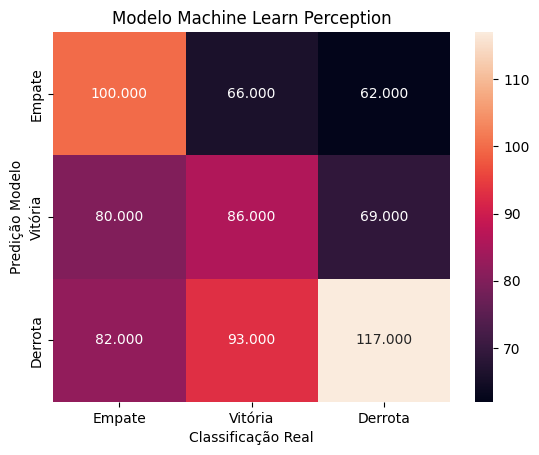

In [54]:
#imprimir a Matriz de Confusão para Machine Learn Perception
mlp_y_pred = mlp.predict(X_test)

mlp_cm = metrics.confusion_matrix(mlp_y_pred, y_test)

sns.heatmap(mlp_cm, annot=True, fmt='.3f', xticklabels = ["Empate", "Vitória", "Derrota"] , yticklabels = ["Empate", "Vitória", "Derrota"] )

plt.ylabel('Predição Modelo')
plt.xlabel('Classificação Real')
plt.title('Modelo Machine Learn Perception')

#Verificação de distribuição Normal.

In [56]:
# Verifica os valores de Poder de ataque mandante para definir a quantidade de intervalos no histograma.
DataFrame_Geral_visvit['poder_ataque_time_mandante'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

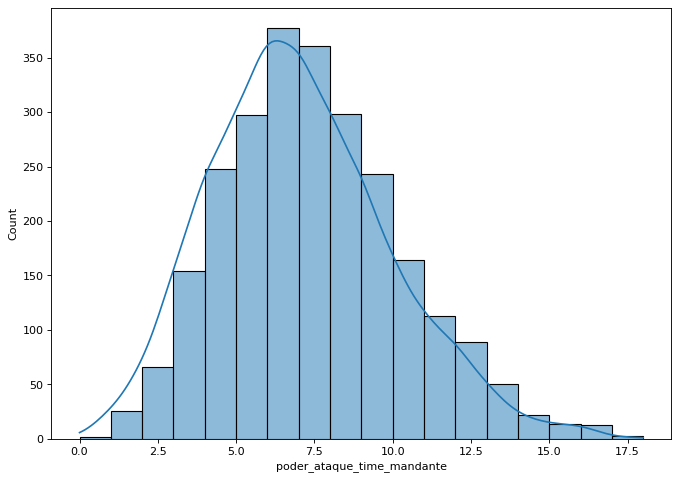

In [65]:
# Verificando se a distribuição é Normal
plt.figure(figsize=(10,7), dpi= 80)
sns.histplot(DataFrame_Geral_visvit['poder_ataque_time_mandante'], bins=18, kde=True)
plt.show()

In [66]:
# Verifica os valores de Poder de ataque visitante para definir a quantidade de intervalos no histograma.
DataFrame_Geral_visvit['poder_ataque_time_visitante'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16])

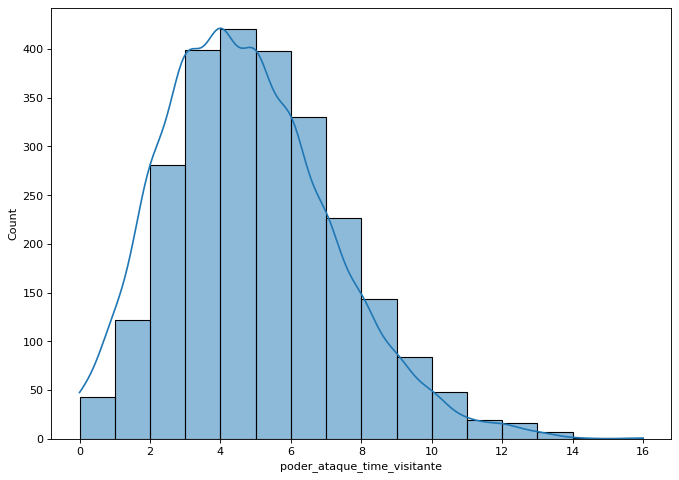

In [67]:
# Verificando se a distribuição é Normal
plt.figure(figsize=(10,7), dpi= 80)
sns.histplot(DataFrame_Geral_visvit['poder_ataque_time_visitante'], bins=16, kde=True)
plt.show()

In [68]:
# Verifica os valores de Poder de defesa mandante para definir a quantidade de intervalos no histograma.
DataFrame_Geral_visvit['poder_defesa_time_mandante'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

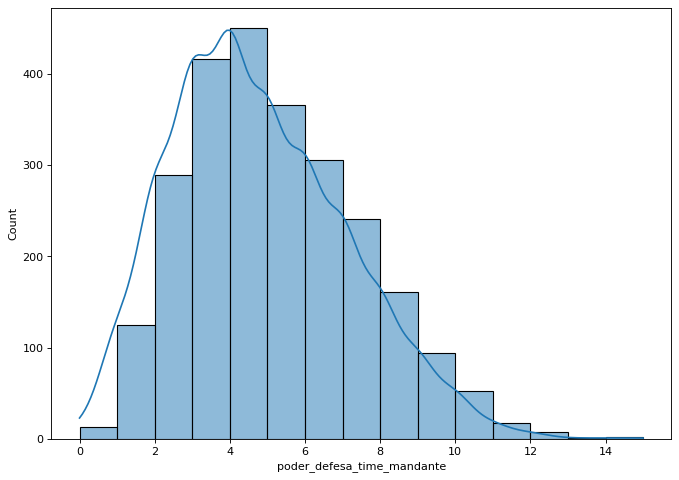

In [69]:
# Verificando se a distribuição é Normal
plt.figure(figsize=(10,7), dpi= 80)
sns.histplot(DataFrame_Geral_visvit['poder_defesa_time_mandante'], bins=15, kde=True)
plt.show()

In [70]:
# Verifica os valores de Poder de defesa visitante para definir a quantidade de intervalos no histograma.
DataFrame_Geral_visvit['poder_defesa_time_visitante'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 20])

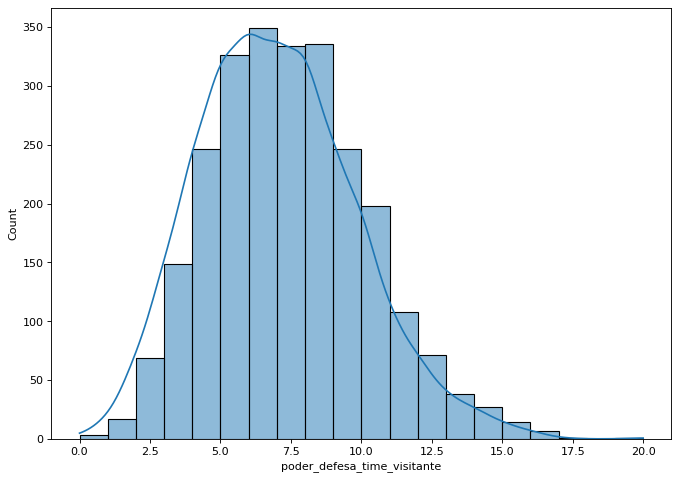

In [71]:
# Verificando se a distribuição é Normal
plt.figure(figsize=(10,7), dpi= 80)
sns.histplot(DataFrame_Geral_visvit['poder_defesa_time_visitante'], bins=20, kde=True)
plt.show()

# Teste de normalidade - Kolmogorov-Smirnov

In [94]:
# Importa biblioteca estatística.
import scipy.stats as stats
# Performing normaltest
from scipy.stats import normaltest
import pylab as p

In [ ]:
# O teste de normalidade de Kolmogorov-Smirnov é um teste de hipóteses que testa
# a hipótese nula de que os dados seguem uma distribuição normal.
# O p-valor do teste é a probabilidade de obter uma ks_statistic tão extrema ou
# mais extrema do que a observada, assumindo que a hipótese nula é verdadeira.

# Um p-valor menor que 0,05 indica que há uma diferença significativa entre a
# funcao de distribuicao cumulativa (CDF) dos dados observados e a CDF de uma
# distribuição normal. Nesse caso, a hipótese nula é rejeitada e conclui-se que
# os dados não seguem uma distribuição normal.

# Portanto, a ks_statistic é um indicador da diferença entre a distribuição de
# frequência dos dados observados e a distribuição de frequência esperada de uma
# distribuição normal.
# Um valor alto de ks_statistic indica que há uma diferença significativa entre as
# duas distribuições.

In [93]:
# Conjunto de dados discretos
dados_PAM = DataFrame_Geral_visvit['poder_ataque_time_mandante']

# Realiza o teste de Kolmogorov-Smirnov
ks_statistic, p_value = stats.kstest(dados_PAM, 'norm')

# Imprime o resultado do teste
print('ks_statistic:', ks_statistic)
print('p_value:', p_value)

ks_statistic: 0.9662262460045767
p_value: 0.0


In [96]:
# Conjunto de dados discretos
dados_PAV = DataFrame_Geral_visvit['poder_ataque_time_visitante']

# Realiza o teste de Kolmogorov-Smirnov
ks_statistic, p_value = stats.kstest(dados_PAV, 'norm')

# Imprime o resultado do teste
print('ks_statistic:', ks_statistic)
print('p_value:', p_value)

ks_statistic: 0.912289238130561
p_value: 0.0


In [97]:
# Conjunto de dados discretos
dados_PDM = DataFrame_Geral_visvit['poder_defesa_time_mandante']

# Realiza o teste de Kolmogorov-Smirnov
ks_statistic, p_value = stats.kstest(dados_PDM, 'norm')

# Imprime o resultado do teste
print('ks_statistic:', ks_statistic)
print('p_value:', p_value)

ks_statistic: 0.9229191593904035
p_value: 0.0


In [98]:
# Conjunto de dados discretos
dados_PDV = DataFrame_Geral_visvit['poder_defesa_time_visitante']

# Realiza o teste de Kolmogorov-Smirnov
ks_statistic, p_value = stats.kstest(dados_PDV, 'norm')

# Imprime o resultado do teste
print('ks_statistic:', ks_statistic)
print('p_value:', p_value)

ks_statistic: 0.9693758523037893
p_value: 0.0


# One hot Encoding

In [72]:
# Array com variáveis que serão Dummy's
#array_times = ['mandante', 'vistante']
array_result = ['classe_resultado']

# transformação das variáveis em Dummy e incorporação no dataframe.
for resultado in array_result:
  lista_result = 'result' + '_' + resultado
  lista_result = pd.get_dummies(DataFrame_Geral_visvit[resultado], prefix=resultado)
  DataFrame_Geral_visvit_Catgor_result = DataFrame_Geral_visvit.join(lista_result)
  DataFrame_Geral_visvit = DataFrame_Geral_visvit_Catgor_result

In [73]:
# Verifica resultados
DataFrame_Geral_visvit.columns

Index(['poder_ataque_time_mandante', 'poder_ataque_time_visitante',
       'poder_defesa_time_mandante', 'poder_defesa_time_visitante',
       'classe_resultado', 'classe_resultado_0.0', 'classe_resultado_0.5',
       'classe_resultado_1.0'],
      dtype='object')

In [74]:
DataFrame_Geral_visvit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540 entries, 0 to 2539
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   poder_ataque_time_mandante   2540 non-null   int64  
 1   poder_ataque_time_visitante  2540 non-null   int64  
 2   poder_defesa_time_mandante   2540 non-null   int64  
 3   poder_defesa_time_visitante  2540 non-null   int64  
 4   classe_resultado             2540 non-null   float64
 5   classe_resultado_0.0         2540 non-null   uint8  
 6   classe_resultado_0.5         2540 non-null   uint8  
 7   classe_resultado_1.0         2540 non-null   uint8  
dtypes: float64(1), int64(4), uint8(3)
memory usage: 106.8 KB


In [76]:
DataFrame_Geral_visvit.head()

,poder_ataque_time_mandante,poder_ataque_time_visitante,poder_defesa_time_mandante,poder_defesa_time_visitante,classe_resultado,classe_resultado_0.0,classe_resultado_0.5,classe_resultado_1.0
0,9,6,8,5,1.0,0,0,1
1,12,0,7,4,1.0,0,0,1
2,6,11,9,12,0.5,0,1,0
3,8,5,5,4,0.0,1,0,0
4,14,7,6,6,0.0,1,0,0


In [77]:
# Correlação de Kendall_tau
DataFrame_Geral_visvit.corr(method='kendall')
# é melhor urtilizar o médoto de Kendall tau, pois o método de Spearma pressupõe dados contínuos.
# Em kendall tau a correlação é mais fraca do que no método de Spearman.

,poder_ataque_time_mandante,poder_ataque_time_visitante,poder_defesa_time_mandante,poder_defesa_time_visitante,classe_resultado,classe_resultado_0.0,classe_resultado_0.5,classe_resultado_1.0
poder_ataque_time_mandante,1.000000,-0.019982,-0.071606,0.000465,0.080700,-0.071194,-0.020544,0.078902
poder_ataque_time_visitante,-0.019982,1.000000,0.020938,-0.042881,-0.074386,0.047176,0.047646,-0.082337
poder_defesa_time_mandante,-0.071606,0.020938,1.000000,-0.004195,-0.090343,0.079043,0.022386,-0.087227
poder_defesa_time_visitante,0.000465,-0.042881,-0.004195,1.000000,0.065997,-0.043512,-0.040257,0.072685
classe_resultado,0.080700,-0.074386,-0.090343,0.065997,1.000000,-0.762089,-0.274687,0.892966
classe_resultado_0.0,-0.071194,0.047176,0.079043,-0.043512,-0.762089,1.000000,-0.337149,-0.555705
classe_resultado_0.5,-0.020544,0.047646,0.022386,-0.040257,-0.274687,-0.337149,1.000000,-0.595347
classe_resultado_1.0,0.078902,-0.082337,-0.087227,0.072685,0.892966,-0.555705,-0.595347,1.000000


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:181: UserWarning: The label '_nolegend_' of <matplotlib.patches.Patch object at 0x78389c55eb60> starts with '_'. It is thus excluded from the legend.
  figlegend = self._figure.legend(handles, labels, **kwargs)


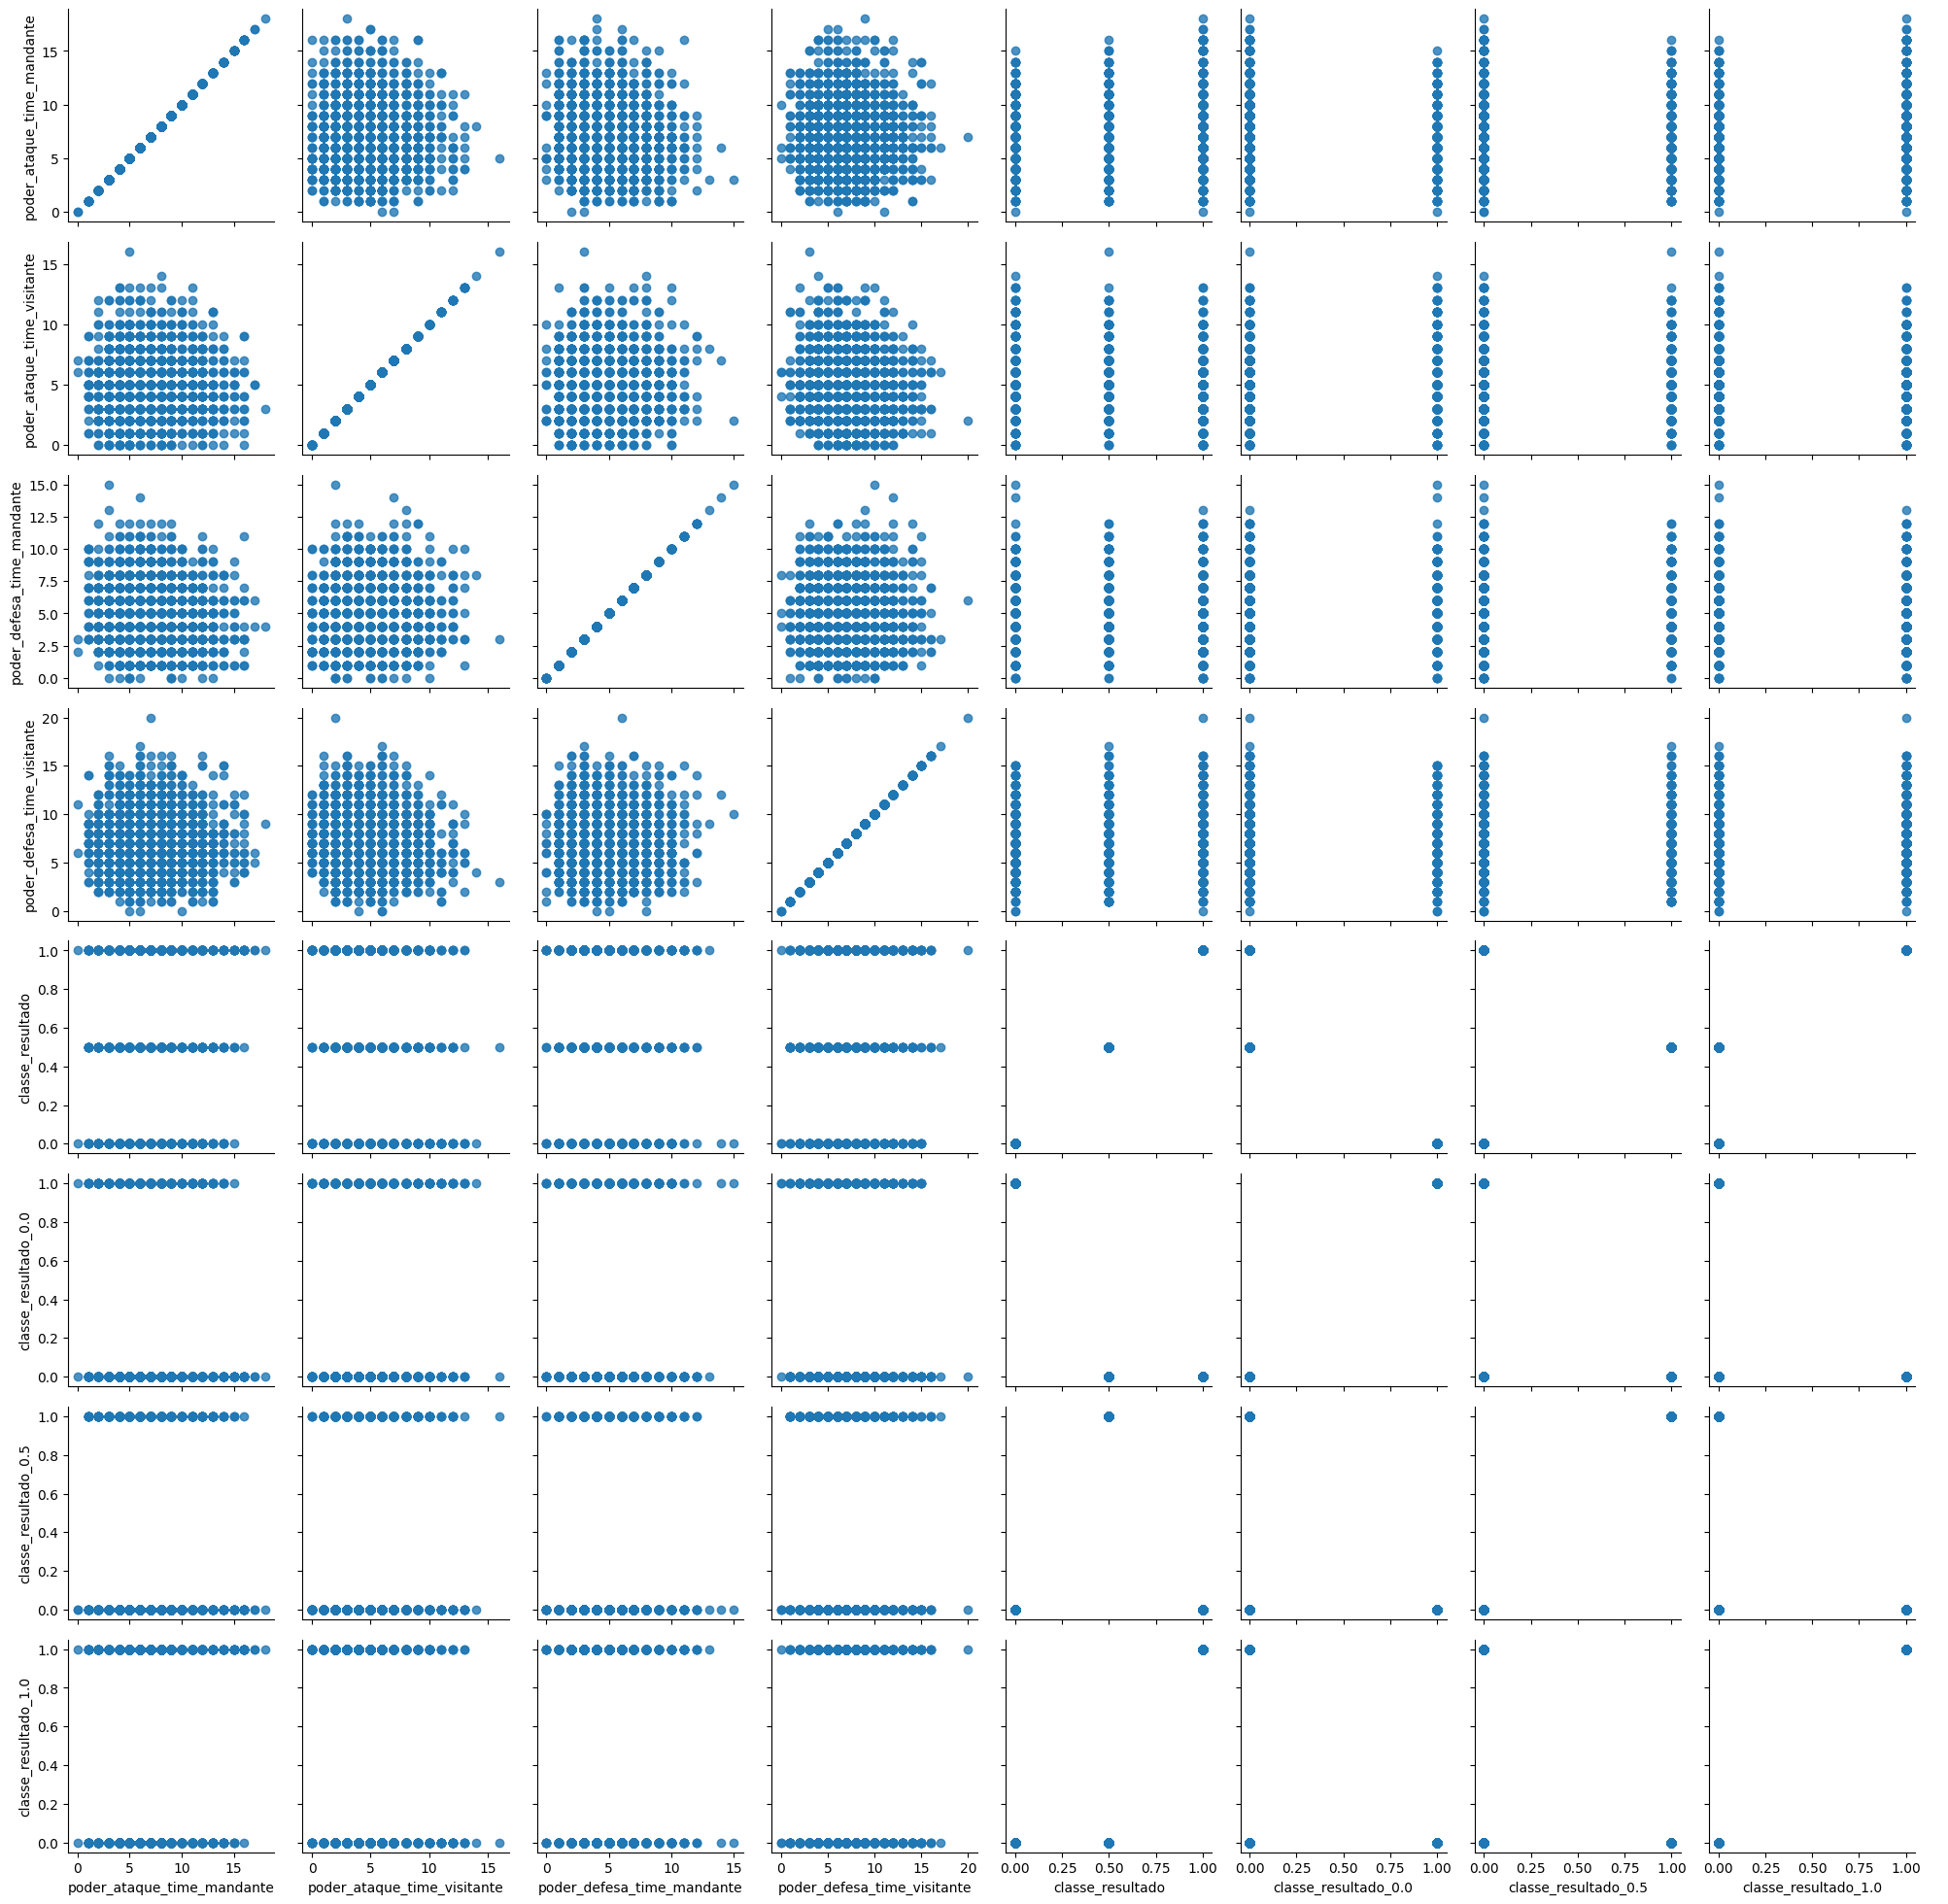

In [89]:
# scatter plot
g = sns.PairGrid(DataFrame_Geral_visvit, vars=['poder_ataque_time_mandante', 'poder_ataque_time_visitante',
                                        'poder_defesa_time_mandante',	'poder_defesa_time_visitante',	'classe_resultado',
                                        'classe_resultado_0.0',	'classe_resultado_0.5',	'classe_resultado_1.0'])
g.map(plt.scatter, alpha=0.8)
g.add_legend();

# %matplotlib inline
# import matplotlib.pyplot as plt
# import seaborn as sns


# # scatter plot
# g = sns.PairGrid(DataFrame_Geral_visvit, vars=['poder_ataque_time_mandante', 'poder_ataque_time_visitante',
#                                                'poder_defesa_time_mandante', 'poder_defesa_time_visitante',	'classe_resultado',
#                                                'classe_resultado_0.0',	'classe_resultado_0.5',	'classe_resultado_1.0'],
#                  hue='classe_resultado', palette='BRdu_r')
# g.map(plt.scatter, alpha=0.8)
# g.add_legend();

In [ ]:
# Quais tecnicas de IA podem ser utilizadas como alternativa a tecnica de Machine Learning Percepton ?

# Resposta do ChatGPT:
# O Perceptron é um algoritmo de aprendizado supervisionado de aprendizado de máquina que foi projetado para classificação binária. Existem várias técnicas de inteligência artificial (IA)
# que podem ser utilizadas como alternativas ao Perceptron, dependendo dos requisitos específicos do problema. Algumas alternativas comuns incluem:

# Redes Neurais Artificiais (RNAs): As RNAs são uma generalização do Perceptron, com camadas intermediárias (ocultas) que permitem modelar relações mais complexas nos dados.
# Redes mais profundas, como Redes Neurais Profundas (Deep Neural Networks - DNNs), têm mostrado sucesso em várias tarefas, incluindo reconhecimento de imagem, processamento de linguagem natural,
# entre outros.

# Support Vector Machines (SVM): SVM é um algoritmo de aprendizado de máquina que pode ser usado tanto para classificação quanto para regressão. Ele busca encontrar um hiperplano de
# separação ótimo entre as classes.

# Árvores de Decisão: Este é um método de aprendizado supervisionado que utiliza uma árvore como um modelo preditivo para mapear características para decisões. É frequentemente utilizado
# para classificação.

# Random Forests: É uma extensão das árvores de decisão. Consiste em um conjunto de árvores de decisão e fornece uma predição mais robusta, especialmente em conjuntos de dados grandes e complexos.

# Regressão Logística: Apesar do nome, a regressão logística é usada para problemas de classificação binária. Ela modela a probabilidade de pertencer a uma classe em vez de uma saída discreta.

# Redes Neurais Convolucionais (CNNs): Especialmente eficazes em tarefas de visão computacional, as CNNs são projetadas para processar e reconhecer padrões em dados como imagens.

# Redes Neurais Recorrentes (RNNs): Úteis para tarefas que envolvem dados sequenciais, como processamento de linguagem natural (PLN) e séries temporais.

# Algoritmos de Aprendizado por Reforço (RL): Enquanto o Perceptron é usado para aprendizado supervisionado, algoritmos de RL, como Q-Learning ou Deep Q Networks (DQN), são usados em
# ambientes onde um agente toma decisões sequenciais para maximizar uma recompensa ao longo do tempo.

# A escolha da técnica dependerá da natureza do problema, da disponibilidade de dados, da interpretabilidade do modelo e de outros fatores específicos do contexto. É comum experimentar
# com várias abordagens para determinar qual é a mais eficaz para uma determinada tarefa.

In [ ]:
# Compreendendo/Estudando
# Exemplo de Algoritmos de Aprendizado por Reforço (RL):
import numpy as np
import gym

class MyEnvironment(gym.Env):
    def __init__(self):
        super(MyEnvironment, self).__init__()
        self.action_space = gym.spaces.Discrete(3)  # Três ações possíveis
        self.observation_space = gym.spaces.Discrete(4)  # Quatro estados possíveis
        self.state = 0  # Estado inicial
        self.max_steps = 10  # Número máximo de etapas

    def step(self, action):
        # Executa uma ação e retorna a próxima observação, recompensa, indicador de conclusão e informações adicionais
        if action == 0:
            self.state = max(0, self.state - 1)
        elif action == 1:
            self.state = min(3, self.state + 1)
        else:
            pass  # Não faz nada

        reward = -1  # Recompensa padrão para cada etapa
        done = self.state == 3 or self.max_steps <= 0  # Condição de conclusão
        self.max_steps -= 1

        return self.state, reward, done, {}

    def reset(self):
        # Reinicia o ambiente para o estado inicial
        self.state = 0
        self.max_steps = 10
        return self.state

# Implementação do algoritmo Q-Learning
def q_learning(env, learning_rate=0.1, discount_factor=0.9, exploration_prob=0.1, num_episodes=1000):
    # Inicializa a tabela Q com zeros
    q_table = np.zeros((env.observation_space.n, env.action_space.n))

    for episode in range(num_episodes):
        state = env.reset()
        done = False

        while not done:
            # Escolhe uma ação com base na política epsilon-greedy
            if np.random.rand() < exploration_prob:
                action = env.action_space.sample()  # Ação aleatória para exploração
            else:
                action = np.argmax(q_table[state, :])  # Ação com maior Q-value

            # Executa a ação e obtém a próxima observação, recompensa, indicador de conclusão
            next_state, reward, done, _ = env.step(action)

            # Atualiza a tabela Q usando a equação do Q-Learning
            q_table[state, action] += learning_rate * (reward + discount_factor * np.max(q_table[next_state, :]) - q_table[state, action])

            state = next_state

    return q_table

# Testa o agente treinado no ambiente
def test_agent(env, q_table):
    state = env.reset()
    done = False
    total_reward = 0

    while not done:
        action = np.argmax(q_table[state, :])
        next_state, reward, done, _ = env.step(action)
        total_reward += reward
        state = next_state

    return total_reward

# Criando o ambiente e treinando o agente com Q-Learning
env = MyEnvironment()
q_table = q_learning(env)

# Testando o agente treinado
total_reward = test_agent(env, q_table)
print(f"Recompensa total do agente treinado: {total_reward}")


In [ ]:
# Função LogisticRegression do scikit-learn com multi_class='multinomial'
# para realizar a regressão logística multinomial.
# O solver 'lbfgs' é um otimizador adequado para problemas multinomiais.

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Conjunto de dados com três categorias
X = *******  # Características
y = *******  # Três categorias (0, 1, 2)

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o modelo de Regressão Logística Multinomial
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')

# Exibindo o relatório de classificação
print('\nRelatório de Classificação:')
print(classification_report(y_test, y_pred))